In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install openpyxl  # For reading .xlsx files
!pip install pyxlsb

In [3]:
# Load my file
file_path = '/kaggle/input/fundingdf/DistrictCostDatabase_2024 (1).xlsb'  
df = pd.read_excel(file_path, engine='pyxlsb')

print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll       pov       iep       ell     amind  \
0       -3949   -0.373566    3849  0.302567  0.009353  0.204729  0.001823   
1       -3879   -0.216288    4104  0.334258  0.074561  0.197856  0.001467   
2       -3017   -0.190391    4143  0.339477  0.063481  0.144340  0.000483   
3       -7383   -0.117687    4140  0.444417  0.075604  0.143720  0.001208   
4       -6343   -0.278603    4422  0.389776  0.071009  0.160271  0.001583   

      asian     black      hisp     multi       pac     white  
0  0.004427  0.022917  0.317

In [4]:
# Get a quick summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159034 entries, 0 to 159033
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        159034 non-null  int64  
 1   leaid       159034 non-null  int64  
 2   district    159034 non-null  object 
 3   state_name  159034 non-null  object 
 4   stabbr      159034 non-null  object 
 5   ppcstot     159034 non-null  int64  
 6   predcost    159034 non-null  int64  
 7   fundinggap  159034 non-null  int64  
 8   outcomegap  113880 non-null  float64
 9   enroll      159034 non-null  int64  
 10  pov         159034 non-null  float64
 11  iep         155023 non-null  float64
 12  ell         157748 non-null  float64
 13  amind       159034 non-null  float64
 14  asian       159034 non-null  float64
 15  black       159034 non-null  float64
 16  hisp        159034 non-null  float64
 17  multi       139366 non-null  float64
 18  pac         136863 non-null  float64
 19  wh

In [ ]:
print(df.describe())

In [ ]:
print(df.isnull().sum())

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


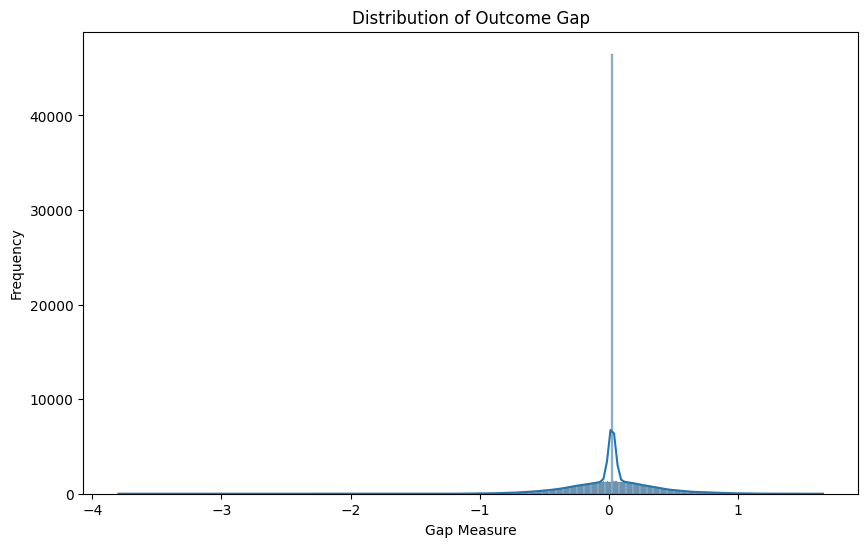

In [15]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['outcomegap'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of Outcome Gap')
plt.xlabel('Gap Measure')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['multi'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of Multi race')
plt.xlabel('% of Multirace students')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['pac'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of Pac students')
plt.xlabel('% of Pac students')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['iep'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of iep students')
plt.xlabel('% of iep students')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot histogram to inspect the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ell'], kde=True)  # kde=True adds a kernel density estimate (smooth curve)
plt.title('Distribution of ell students')
plt.xlabel('% of ell students')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Impute with the mean for numerical variables
df[['outcomegap', 'iep']] = df[['outcomegap', 'iep']].apply(lambda x: x.fillna(x.mean()))

In [6]:
# Impute with the mode for numerical variables
df[['multi', 'pac', 'ell']] = df[['multi', 'pac', 'ell']].apply(lambda x: x.fillna(x.mode()[0]))

In [7]:
print(df.isnull().sum())

year          0
leaid         0
district      0
state_name    0
stabbr        0
ppcstot       0
predcost      0
fundinggap    0
outcomegap    0
enroll        0
pov           0
iep           0
ell           0
amind         0
asian         0
black         0
hisp          0
multi         0
pac           0
white         0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define features and target variable
features = [
    'enroll', 'pov', 'iep','ell', 'amind','asian', 'black', 'hisp','multi', 'pac','white'
]

# The target variable is 'Gap between actual and required spending per-pupil'
target = 'fundinggap'

X = df[features]  # Features
y = df[target]  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Training the Model 
# Initialize the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance

from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")

print(f"R-squared: {r2}")

In [ ]:
# Get feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to visualize importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

In [ ]:
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Now, scale the test data using the same scaler (important to use the same scaler)
X_test_scaled = scaler.transform(X_test)

# Make predictions using the trained model on the scaled test data
predictions = rf_model.predict(X_test_scaled)

# Output predictions
print("Predictions on Test Data:", predictions)

# Optionally, evaluate the model's performance on the test data
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on Test Data:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

In [11]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlations between numerical columns
correlation_matrix = numerical_df.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")

# Save the heatmap to a file in the /kaggle/working/ directory
plt.savefig('/kaggle/working/correlation_heatmap.png')  # Save the heatmap as an image
plt.close()  # Close the plot to avoid displaying it twice

# Optionally, display the heatmap (it will be saved already)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

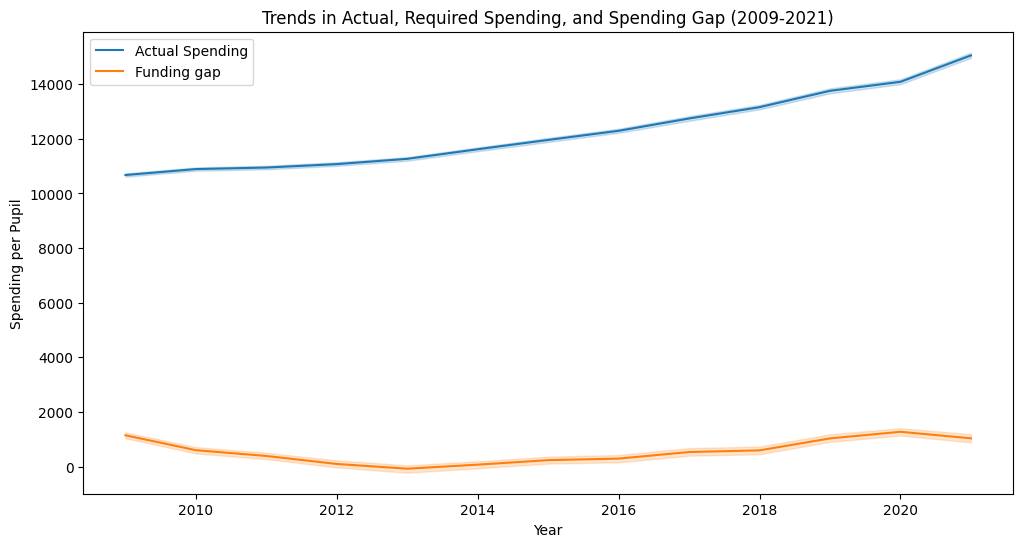

In [17]:
# Plot actual spending per pupil, required spending per pupil, and the gap over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='ppcstot', label='Actual Spending')
sns.lineplot(data=df, x='year', y='fundinggap', label='Funding gap')
plt.title('Trends in Actual, Required Spending, and Spending Gap (2009-2021)')
plt.xlabel('Year')
plt.ylabel('Spending per Pupil')
plt.legend()
# Save the plot to a file in the /kaggle/working/ directory
plt.savefig('/kaggle/working/spending_gap_trends.png')  # Save the plot as an image
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

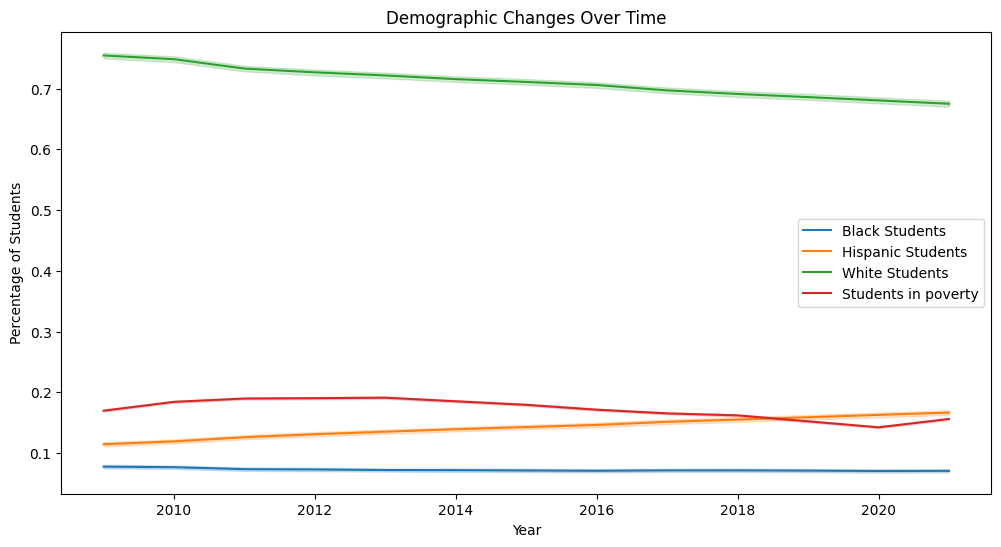

In [18]:
# Plot demographic breakdown (e.g., percentage of Black, Hispanic students)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='black', label='Black Students')
sns.lineplot(data=df, x='year', y='hisp', label='Hispanic Students')
sns.lineplot(data=df, x='year', y='white', label='White Students')
sns.lineplot(data=df, x='year', y='pov', label='Students in poverty')
plt.title('Demographic Changes Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Students')
plt.legend()
plt.show()

In [ ]:
# Plot boxplot for percent special education students over the years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='iep')
plt.title('Distribution of Special Education Students Over Time')
plt.xlabel('Year')
plt.ylabel('Percent of Special Education Students')
plt.show()

# Plot boxplot for percent ELL students over the years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='ell')
plt.title('Distribution of ELL Students Over Time')
plt.xlabel('Year')
plt.ylabel('Percent of ELL Students')
plt.show()

# Plot boxplot for child poverty rate over the years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='pov')
plt.title('Distribution of Child Poverty Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Child Poverty Rate')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


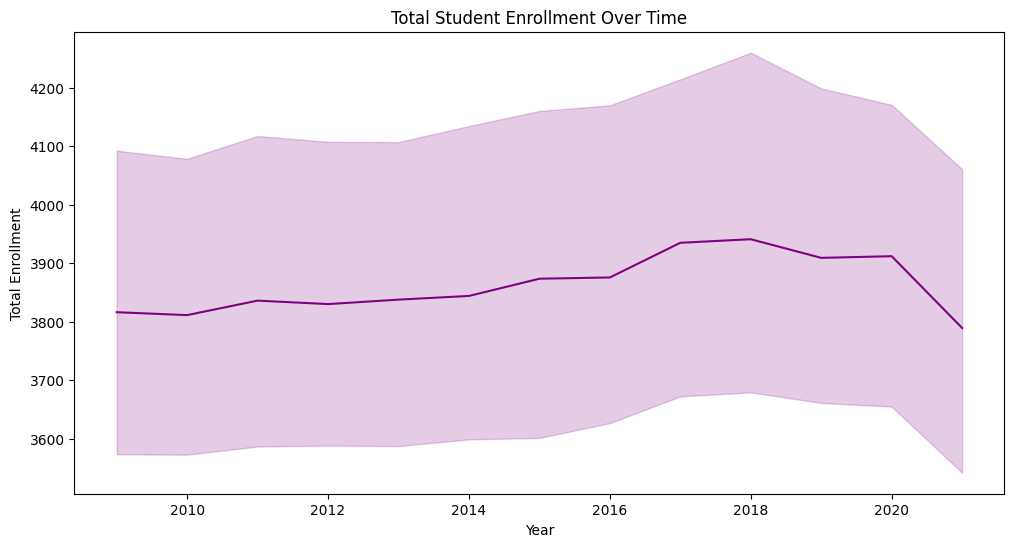

In [19]:
# Plot total student enrollment over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='enroll', color='purple')
plt.title('Total Student Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.show()

In [ ]:
# Select a subset of columns to visualize relationships
subset_df = df[['year', 'fundinggap','iep','pov','ell','black','hisp']]

# Pairplot
sns.pairplot(subset_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


In [ ]:
# This code creates a function that produces a new column to identify the racial majority of a School District

def majority_minority(row):

  """

  This function will check which racial grouping, White/Asian or Black/Hispanic/American Indian, 

  comprises over 50% of the student population

  """

  # Combine percentages for White/Asian and URM groups

  white_asian_percentage = row['white'] + row['asian']

  minority_percentage = row['black'] + row['hisp'] + row['amind']+ row['multi']+ row['pac']

  

  if white_asian_percentage > 0.50:

      return "White/Asian Majority"

  elif minority_percentage > 0.50:

      return "URM Majority"

  else:

      return "Mixed"

 

# Run the function to create the new column

df['Majority_Group'] = df.apply(majority_minority, axis=1)
print(df.head())

In [12]:
state_to_region = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Create a new column for regions
df['Region'] = df['state_name'].map(state_to_region)

# Display the updated DataFrame
print(df)

        year    leaid                          district state_name stabbr  \
0       2009   100005                  ALBERTVILLE CITY    Alabama     AL   
1       2010   100005                  ALBERTVILLE CITY    Alabama     AL   
2       2011   100005                  ALBERTVILLE CITY    Alabama     AL   
3       2012   100005                  ALBERTVILLE CITY    Alabama     AL   
4       2013   100005                  ALBERTVILLE CITY    Alabama     AL   
...      ...      ...                               ...        ...    ...   
159029  2017  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159030  2018  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159031  2019  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159032  2020  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159033  2021  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   

        ppcstot  predcost  fundinggap  outcomegap  enroll  ...       iep  \

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a variable to filter the dataset by any year of interest
df_year = df[df['year'] == 2009]                    # Just like in section 1.3.1, you can use Boleans and comparison opperators to filter

# We specify a size for our figure, and then construct a boxplot. Here we are looking at the
plt.figure(figsize=(10, 15))                        # You can change the size
sns.boxplot(data=df_year, x="fundinggap", y="stabbr")     # You can change the values of x and/or y for variables that interest you

# Label our axes and title
plt.xlabel("District funding gap levels")
plt.ylabel("State")
plt.title("Funding gap levels by State")


#Print the plot
plt.show()

In [ ]:
# Aggregate funding data by State and Year (e.g., taking the mean)
agg_df = df.groupby(['state_name', 'year'], as_index=False)['ppcstot'].mean()

# Pivot the aggregated DataFrame for heatmap
pivot_df = agg_df.pivot(index='state_name', columns='year', values='ppcstot')

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Funding Levels'})
plt.title('Funding Levels by State and Year')
plt.xlabel('Year')
plt.ylabel('State')

plt.savefig('/kaggle/working/Fundingbystate.png')  # Save the heatmap as an image
plt.close()  # Close the plot to avoid displaying it twice
plt.show()

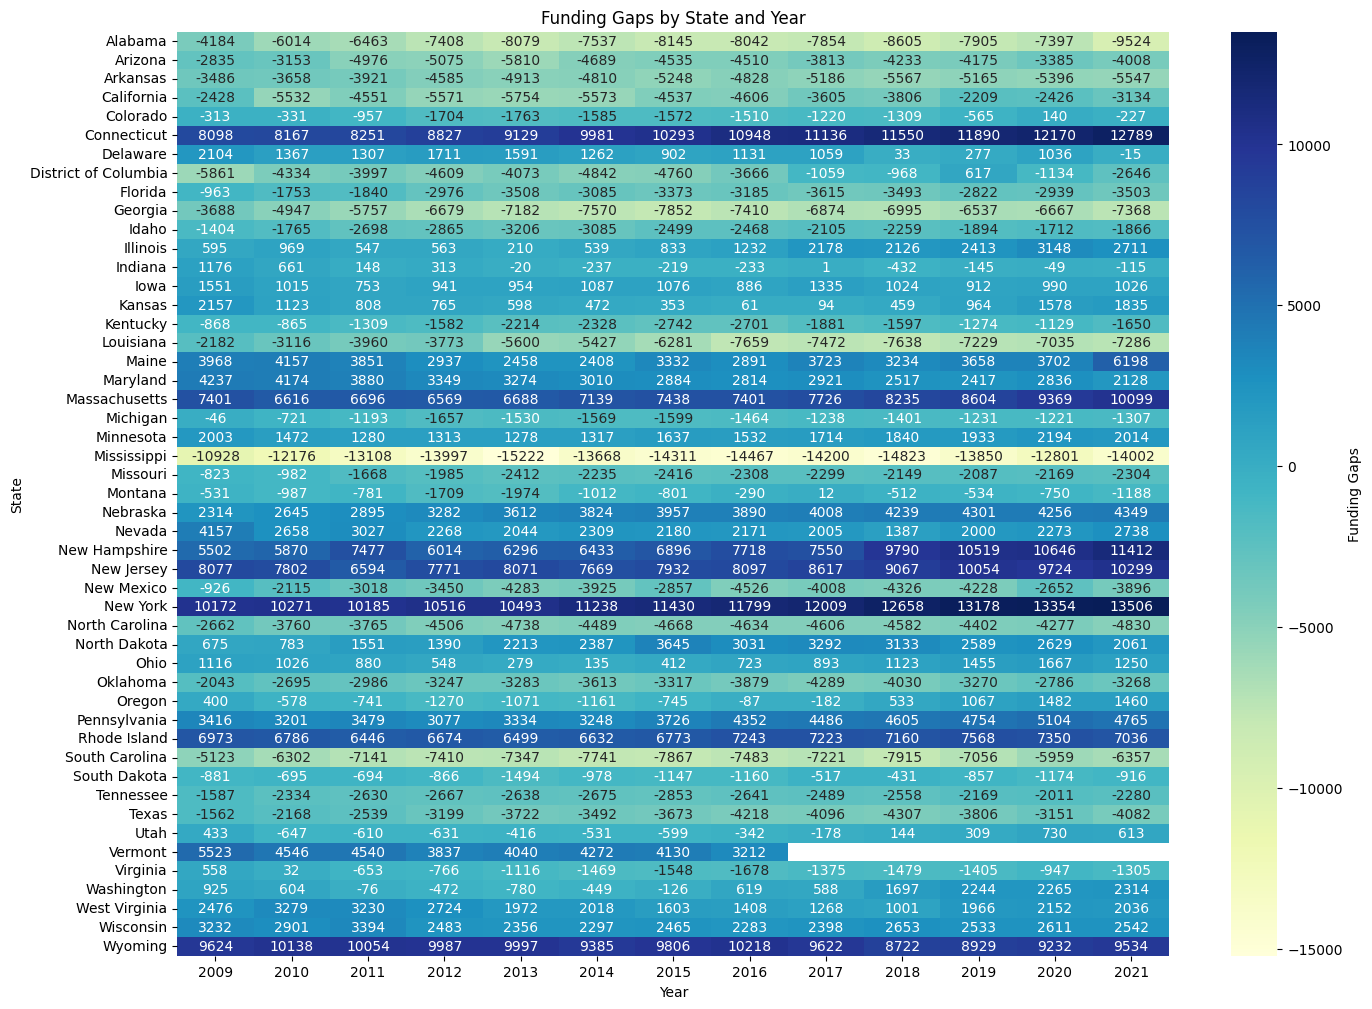

In [13]:
# Aggregate funding gaps by State and Year (e.g., taking the mean)
agg_df = df.groupby(['state_name', 'year'], as_index=False)['fundinggap'].mean()

# Pivot the aggregated DataFrame for heatmap
pivot_df = agg_df.pivot(index='state_name', columns='year', values='fundinggap')

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Funding Gaps'})
plt.title('Funding Gaps by State and Year')
plt.xlabel('Year')
plt.ylabel('State')

# Step 4: Save the figure as a PDF
plt.savefig('visualization.pdf', format='pdf', bbox_inches='tight')

plt.show()

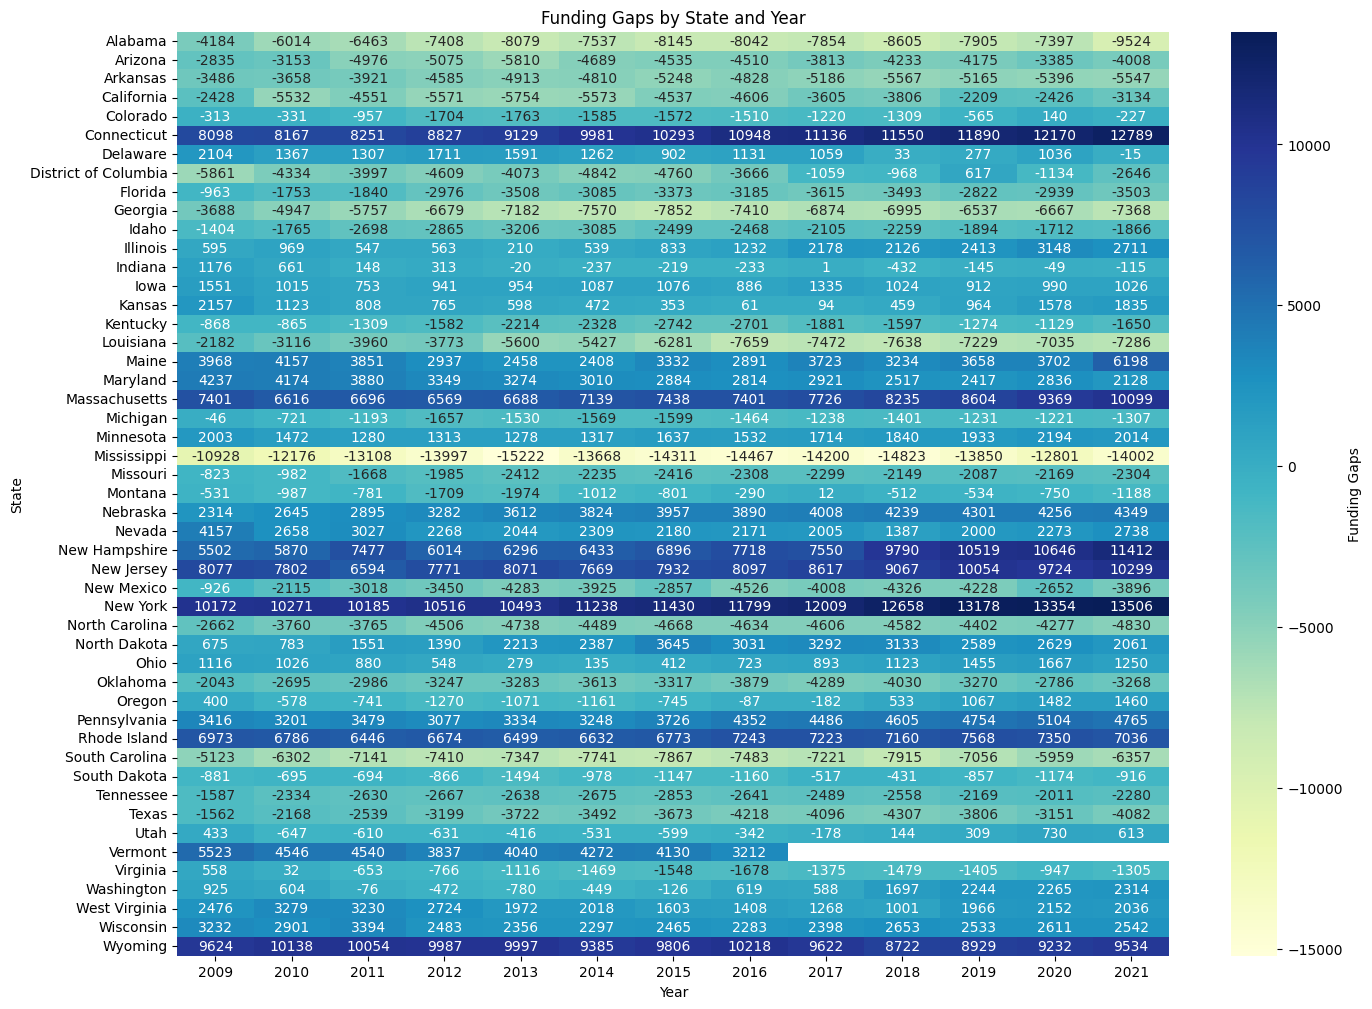

In [20]:
# play with this to redo the colors

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate funding gaps by State and Year (e.g., taking the mean)
agg_df = df.groupby(['state_name', 'year'], as_index=False)['fundinggap'].mean()

# Pivot the aggregated DataFrame for heatmap
pivot_df = agg_df.pivot(index='state_name', columns='year', values='fundinggap')

# Create a diverging color palette from skyblue to red
cmap = sns.diverging_palette(200, 20, s=75, l=50, as_cmap=True)

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Funding Gaps'})
plt.title('Funding Gaps by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define features and target variable
features = [
    'enroll', 'pov', 'iep','ell', 'amind','asian', 'black', 'hisp','multi', 'pac','white'
]

# The target variable is 'Gap between actual and required spending per-pupil'
target = 'fundinggap'

X = df[features]  # Features
y = df[target]  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Training the Model 
# Initialize and train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model's performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Model - Mean Squared Error: {mse_dt}')
print(f'Decision Tree Model - R-squared: {r2_dt}')

In [ ]:
#Option 2: Random Forest
# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model - Mean Squared Error: {mse_rf}')
print(f'Random Forest Model - R-squared: {r2_rf}')


In [ ]:
# Making predictions on new data 
# Replace 'new_data' with new data for prediction
new_data_scaled = scaler.transform(new_data)
predictions = rf_model.predict(new_data_scaled) 


In [ ]:
# Save the heatmap as a PDF file
plt.savefig('funding_gaps_heatmap.pdf')  # Save as PDF
plt.close()  # Close the plot to avoid displaying it again

# Move the PDF file to the output directory for downloading
shutil.move('funding_gaps_heatmap.pdf', '/kaggle/working/funding_gaps_heatmap.pdf')


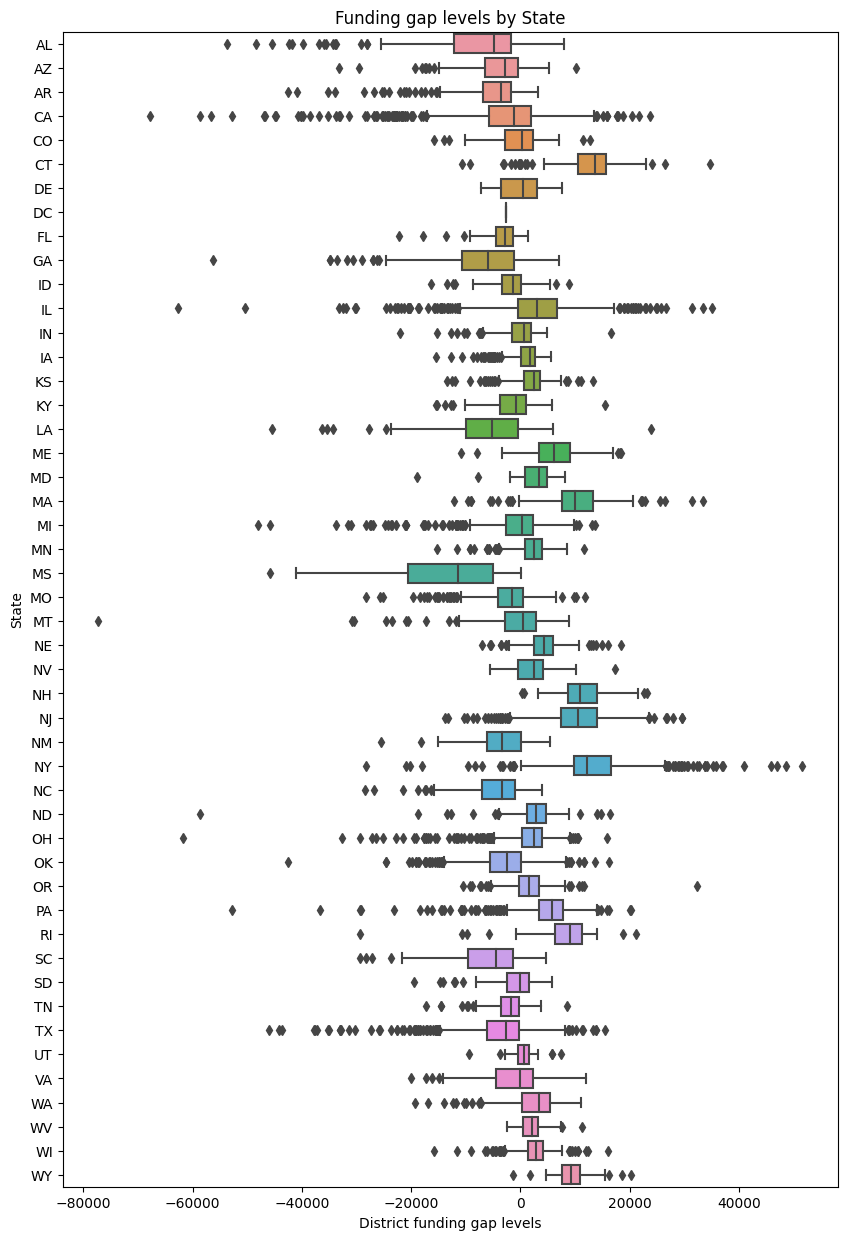

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a variable to filter the dataset by any year of interest
df_year = df[df['year'] == 2021]                    # Just like in section 1.3.1, you can use Boleans and comparison opperators to filter

# We specify a size for our figure, and then construct a boxplot. Here we are looking at the
plt.figure(figsize=(10, 15))                        # You can change the size
sns.boxplot(data=df_year, x="fundinggap", y="stabbr")     # You can change the values of x and/or y for variables that interest you

# Label our axes and title
plt.xlabel("District funding gap levels")
plt.ylabel("State")
plt.title("Funding gap levels by State")


#Print the plot
plt.show()

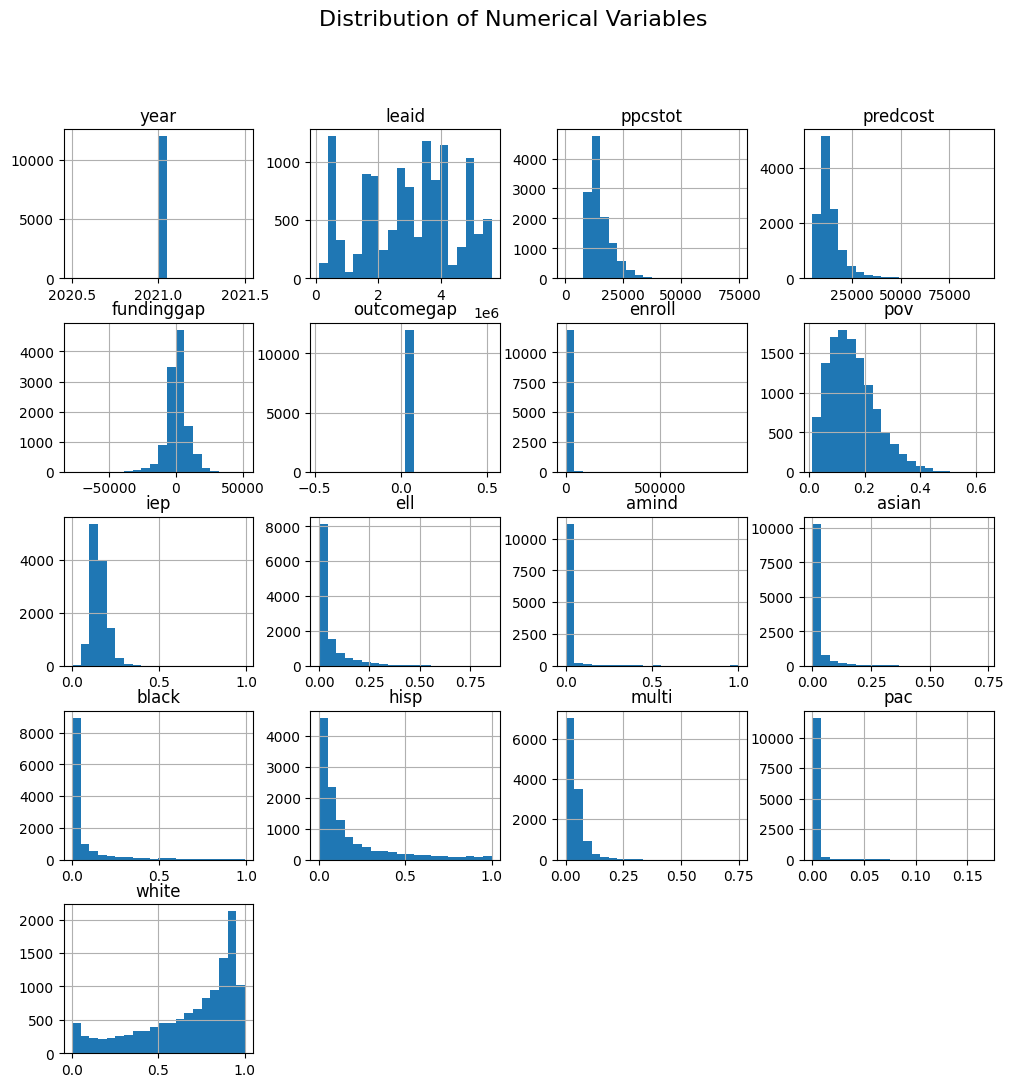

In [22]:
# Filter the dataframe for year 2021
df_hplot = df[df['year'] == 2021]  # This creates a filtered dataframe

# Create histograms for all numerical columns
df_hplot.hist(figsize=(12, 12), bins=20)

# Add title
plt.suptitle('Distribution of Numerical Variables', fontsize=16)

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['RegionCode'] = label_encoder.fit_transform(df['Region'])
print(df.head())

In [ ]:
df['Race_Ethn'] = label_encoder.fit_transform(df['Majority_Group'])
print(df.head())

In [23]:
# Create a count plot for ethnicity over time using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='Race_Ethn', palette='viridis')
plt.title('Distribution of Ethnicity Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

ValueError: Could not interpret input 'Race_Ethn'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Add Region as a facet
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='Region', col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(sns.countplot, x='year', hue='Race_Ethn', palette='viridis', dodge=True)
g.add_legend(title='Ethnicity')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Count")

# Adjust layout for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#We begin by importing plotly.express as px
import plotly.express as px

#Ask Abi about this idea
# Create an interactive scatter plot
fig = px.scatter(df,
                 x="ppcstot",
                 y="RegionCode",
                 size="enroll",
                 size_max=70,
                 color="year",                  # Both the color and size of the bubblues will reference the total enrollment of each district
                 hover_name="Region")


# Customize and show the plot
fig.update_layout(title='Interactive Plot')
fig.show()

In [ ]:
# Calculate mean funding level by state and year
mean_funding = df.groupby(['state_name', 'year'])['ppcstot'].mean().reset_index()

# Formatting the output nicely
mean_funding['ppcstot'] = mean_funding['ppcstot'].map('${:,.2f}'.format)  # Formatting as currency

# Display the results
print(mean_funding)


In [ ]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Check for normality using Shapiro-Wilk test
print("\nShapiro-Wilk Test Results:")
for year in df['year'].unique():
    stat, p_value = stats.shapiro(df[df['year'] == year]['ppcstot'])
    print(f"{year}: Statistic={stat:.3f}, p-value={p_value:.3f}")

# 2. Check for homogeneity of variances using Levene's test
print("\nLevene's Test Results:")
stat, p_value = stats.levene(
    df[df['year'] == '2009']['ppcstot'],
    df[df['year'] == '2010']['ppcstot'],
    df[df['year'] == '2011']['ppcstot'],
    df[df['year'] == '2012']['ppcstot'],
    df[df['year'] == '2013']['ppcstot'],
    df[df['year'] == '2014']['ppcstot'],
    df[df['year'] == '2015']['ppcstot'],
    df[df['year'] == '2016']['ppcstot'],
    df[df['year'] == '2017']['ppcstot'],
    df[df['year'] == '2018']['ppcstot'],
    df[df['year'] == '2019']['ppcstot'],
    df[df['year'] == '2020']['ppcstot'],
    df[df['year'] == '2021']['ppcstot']
)
print(f"Levene's Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

# 3. Conduct One-Way ANOVA
model = ols('ppcstot ~ year', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print("\nANOVA Results:")
print(anova_table)

In [ ]:
from scipy.stats import shapiro, levene

# Check normality for each group
for state in df['state_name'].unique():
    stat, p = shapiro(df[df['state_name'] == state]['ppcstot'])
    print(f'State: {state}, Shapiro-Wilk Stat: {stat:.3f}, p-value: {p:.3f}')

# Check homogeneity of variances
stat, p = levene(*[df[df['state_name'] == state]['ppcstot'] for state in df['state_name'].unique()])
print(f'Levene’s Test Stat: {stat:.3f}, p-value: {p:.3f}')

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select relevant features 
features = df[['ppcstot', 'predcost', 'fundinggap', 'enroll', 'pov', 'iep', 'ell', 'amind', 'asian', 'black', 'hisp', 'multi', 'pac','white']]
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
import matplotlib.pyplot as plt
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Fit the K-Means model
optimal_k = 3  # Replace with the optimal K determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

In [ ]:
print(cluster_summary[cluster_summary['Cluster'] == 0])

In [ ]:
print(cluster_summary[cluster_summary['Cluster'] == 1])

In [ ]:
print(cluster_summary[cluster_summary['Cluster'] == 2])

In [ ]:
#Figure out why poverty and ell are not included: # Check the mean values of each feature per cluster
cluster_summary = df.groupby('Cluster')[scaled_features].mean().reset_index()
print(cluster_summary)

In [ ]:
cluster_summary = df.groupby('Cluster').agg({
    'fundinggap': 'mean',
    'enroll': 'mean',
    'pov': 'mean',
    'iep': 'mean',
    'ell': 'mean'
}).reset_index()

print(cluster_summary)

In [ ]:
import seaborn as sns

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fundinggap', y='pov', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of School Districts, all years')
plt.xlabel('Funding Gap')
plt.ylabel('Percentage of Students in Poverty')
plt.show()

In [ ]:
cluster_summary = df.groupby('Cluster').agg({
    'fundinggap': 'mean',
    'amind': 'mean',
    'asian': 'mean',
    'black': 'mean',    
    'hisp': 'mean',
    'multi': 'mean',
    'pac': 'mean',
    'white': 'mean'
}).reset_index()

print(cluster_summary)

In [ ]:
import seaborn as sns

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fundinggap', y='hisp', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of School Districts, all years')
plt.xlabel('Funding Gap')
plt.ylabel('Percentage of Hispanic Students')
plt.show()

In [ ]:
# Plotting the clusters (using two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ppcstot'], y=df['fundinggap'], hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Actual Spending')
plt.ylabel('Funding Gap')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Explore this idea with Abi
# Plotting the clusters (using two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Race_Ethn'], y=df['fundinggap'], hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Race_Ethn')
plt.ylabel('Funding Gap')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Explore this idea with Abi
# Visualize Funding Gap vs. Percentage of Minority Students
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='fundinggap', label='Funding Gap', marker='o')
sns.lineplot(data=df, x='year', y='black', label='Black students', marker='s')
plt.title('Funding Gaps and Black students Over Time')
plt.ylabel('Funding Gap / Black students')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
def find_optimal_clusters(scaled_features, max_clusters=6):
    """
    Find the optimal number of clusters using the elbow method and silhouette score.
    
    Parameters:
    scaled_features (numpy.array): Scaled feature array
    max_clusters (int): Maximum number of clusters to try
    
    Returns:
    tuple: (inertias, silhouette_scores)
    """
    inertias = []
    silhouette_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
        
    return inertias, silhouette_scores

In [ ]:
def plot_clustering_metrics(inertias, silhouette_scores):
    """
    Plot the elbow curve and silhouette scores.
    
    Parameters:
    inertias (list): List of inertia values
    silhouette_scores (list): List of silhouette scores
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot elbow curve
    ax1.plot(range(2, len(inertias) + 2), inertias, marker='o')
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')
    
    # Plot silhouette scores
    ax2.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
    ax2.set_xlabel('Number of clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def perform_clustering(scaled_features, n_clusters):
    """
    Perform K-means clustering with the specified number of clusters.
    
    Parameters:
    scaled_features (numpy.array): Scaled feature array
    n_clusters (int): Number of clusters to create
    
    Returns:
    tuple: (KMeans model, cluster labels)
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    return kmeans, labels

def analyze_clusters(df, feature_columns, labels, scaler):
    """
    Analyze the characteristics of each cluster.
    
    Parameters:
    df (pandas.DataFrame): Original dataframe
    feature_columns (list): List of feature columns used
    labels (numpy.array): Cluster labels
    scaler (StandardScaler): Fitted scaler object
    
    Returns:
    pandas.DataFrame: Cluster analysis results
    """
    # Add cluster labels to the original dataframe
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = labels
    
    # Calculate cluster means
    cluster_means = df_with_clusters.groupby('Cluster')[feature_columns].mean()
    
    # Calculate cluster sizes
    cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
    
    return cluster_means, cluster_sizes

def plot_cluster_characteristics(cluster_means, feature_columns):
    """
    Create a heatmap of cluster characteristics.
    
    Parameters:
    cluster_means (pandas.DataFrame): Mean values for each cluster
    feature_columns (list): List of feature columns used
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means, cmap='RdYlBu', center=0, annot=True, fmt='.2f')
    plt.title('Cluster Characteristics Heatmap')
    plt.show()

In [ ]:
# View all data points in cluster 0
cluster_0 = df[df['cluster'] == 0]
print(cluster_0)